# <font color='orange'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'scaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [8]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.13 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## <font color='orange' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>

<font color='blue'>Initialize weights </font>

In [10]:
def initialize_weights(row_vector):
    w = np.zeros_like(row_vector)
    b = 0
    return w,b  

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='red'>Grader function - 1 </font>

In [12]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$


In [13]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

<font color='red'>Grader function - 2</font>

In [14]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>   

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [15]:
def logloss(y_true,y_pred):
    sum_loss = 0
    for i in range(len(y_true)):
        sum_loss += ((y_true[i] * np.log10(y_pred[i])) + ((1-y_true[i]) * np.log10(1-y_pred[i])))

    loss = -1*(1/len(y_true))*sum_loss

    return loss

<font color='red'>Grader function - 3 </font>

In [16]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(np.round(loss,6)==0.076449)
  return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>


$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [17]:
def gradient_dw(x,y,w,b,alpha,N):
    z = np.dot(w, x) + b
    dw = x*(y - sigmoid(z)) - ((alpha)*(1/N) * w)    
    return dw       

<font color='red'>Grader function - 4 </font>

In [18]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.round(np.sum(grad_dw),5)==4.75684)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)  

True

<font color='blue'>Compute gradient w.r.to 'b' </font>
$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$


In [19]:
def gradient_db(x,y,w,b):
     z = np.dot(w, x) + b
     db = y - sigmoid(z)      
     return db

<font color='red'>Grader function - 5 </font>

In [20]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [21]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

<font color='blue'> Implementing logistic regression</font>

In [22]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0, tol=1e-3):
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    N = len(X_train)
    loss_threshold = 0.0001
    while True:
        for epoch in range(epochs):            
            for row in range(N - 1):
                delta_weights = gradient_dw(X_train[row], y_train[row], w, b, alpha, len(X_train))
                delta_bias = gradient_db(X_train[row], y_train[row], w, b)
                w = w + eta0 * delta_weights
                b = b + eta0 * delta_bias
            y_prediction_train = [sigmoid(np.dot(w, x_row) + b) for x_row in X_train]
            train_loss.append(logloss(y_train, y_prediction_train))
            y_prediction_test = [sigmoid(np.dot(w, x_row) + b) for x_row in X_test]
            test_loss.append(logloss(y_test, y_prediction_test))
        if (len(test_loss) > 3 and (test_loss[-2] - test_loss[-1]) > 0 and (test_loss[-2] - test_loss[-1])) < loss_threshold:
            break
    return w, b, train_loss, test_loss

In [23]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [24]:
#print thr value of weights w and bias b
print(w)
print(b)

[-4.29544774e-01  1.93073768e-01 -1.48270442e-01  3.37989523e-01
 -2.20677122e-01  5.69623610e-01 -4.45130928e-01 -8.98547898e-02
  2.22004636e-01  1.73616951e-01  1.98530756e-01 -3.60154266e-04
 -8.10405962e-02  3.38976456e-01  2.29264700e-02]
-0.8896840160597818


In [25]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[-0.00617786,  0.00759812,  0.00031991, -0.00345455, -0.01249042,
          0.00945782,  0.0072939 ,  0.00423334,  0.01273144, -0.00722431,
          0.00147885, -0.00457931, -0.0014369 ,  0.00044844,  0.00025926]]),
 array([-0.03654572]))

## <font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

<font color='red'>Grader function - 6 </font>

In [26]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

<font color='blue'>Plot your train and test loss vs epochs </font>

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

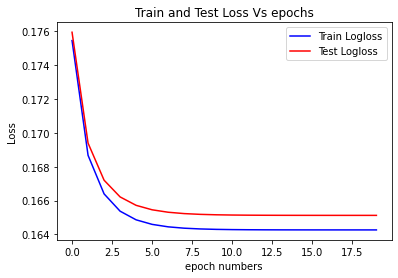

In [27]:
import matplotlib.pyplot as plt

x = np.array([i for i in range(0, 20)])

train_loss = np.array(train_loss)
test_loss = np.array(test_loss)

plt.plot(x, train_loss, "-b", label="Train Logloss")
plt.plot(x, test_loss, "-r", label="Test Logloss")

plt.legend(loc="upper right")

plt.xlabel('epoch numbers')
plt.ylabel('Loss')
plt.title('Train and Test Loss Vs epochs')
plt.show()